In [2]:
# Data manipulation
import numpy as np
import pandas as pd
from collections import Counter
import time

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and pipelines
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as SmotePipeline
from imblearn.over_sampling import SMOTE

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
)

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier


In [3]:
#dataset 
df = pd.read_csv('diabetes_dataset.csv')
#dataset exploration 


df.head(5)

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [4]:
#dataset exploration
df['diagnosed_diabetes'].value_counts()

diagnosed_diabetes
1    59998
0    40002
Name: count, dtype: int64

In [5]:
numeric_features = df.select_dtypes(include=[np.number]).columns.drop(['diagnosed_diabetes','family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'diabetes_risk_score']).tolist()
x = df[numeric_features]

x.describe()


,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,25.612653,0.856078,115.799610,75.23249,69.632870,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,3.586705,0.046837,14.284073,8.20425,8.371954,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,15.000000,0.670000,90.000000,50.00000,40.000000,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,23.200000,0.820000,106.000000,70.00000,64.000000,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,25.600000,0.860000,116.000000,75.00000,70.000000,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000,28.000000,0.890000,125.000000,81.00000,75.000000,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000,39.200000,1.060000,179.000000,110.00000,105.000000,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000


<Axes: >

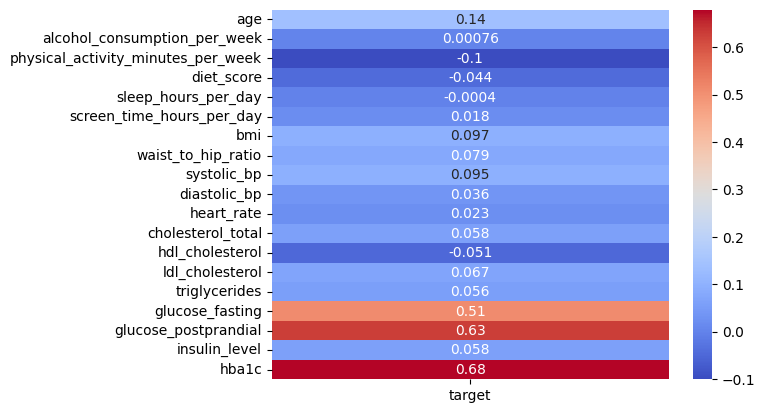

In [6]:
#dataset exploration
corr_matrix_t = x.corrwith(df['diagnosed_diabetes'])
#create new dataframe, otherwise I got a Series() and can't input in sns.heatmap
corr_df = pd.DataFrame(corr_matrix_t, columns=['target'])
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
#Computing correlation matrix


#sns.boxplot(data = x)
#sns.histplot(df['bmi'], kde=True)
#plt.show()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'alcohol_consumption_per_week'}>,
        <Axes: title={'center': 'physical_activity_minutes_per_week'}>,
        <Axes: title={'center': 'diet_score'}>,
        <Axes: title={'center': 'sleep_hours_per_day'}>],
       [<Axes: title={'center': 'screen_time_hours_per_day'}>,
        <Axes: title={'center': 'family_history_diabetes'}>,
        <Axes: title={'center': 'hypertension_history'}>,
        <Axes: title={'center': 'cardiovascular_history'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'waist_to_hip_ratio'}>,
        <Axes: title={'center': 'systolic_bp'}>,
        <Axes: title={'center': 'diastolic_bp'}>,
        <Axes: title={'center': 'heart_rate'}>,
        <Axes: title={'center': 'cholesterol_total'}>],
       [<Axes: title={'center': 'hdl_cholesterol'}>,
        <Axes: title={'center': 'ldl_cholesterol'}>,
        <Axes: title={'center': 'triglycerides'}>,
        <Axes: 

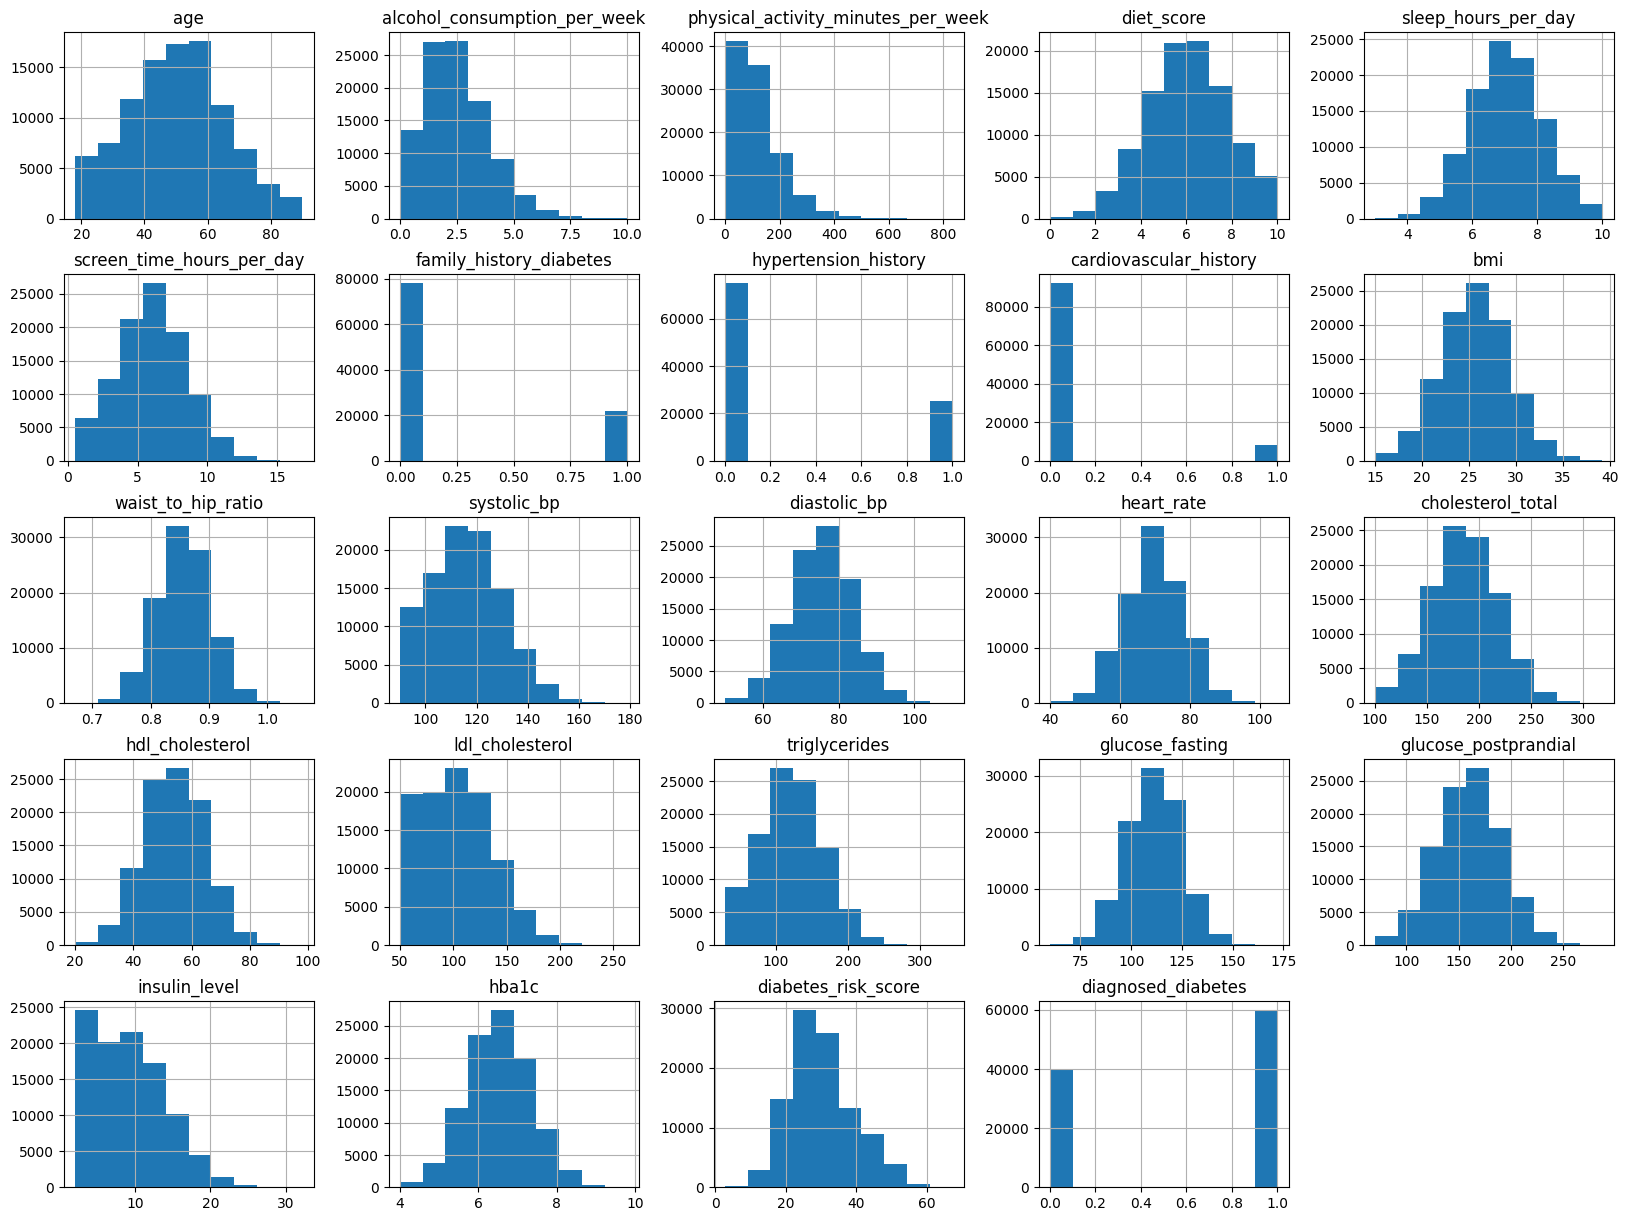

In [8]:
df.hist(figsize=(20,15))

In [ ]:
#dataset preparation, handling features and creating function for metrics evaluation ROC curve plot


# Full pipeline
def build_pipeline(model):
    # Define feature groups
    numeric_features = numeric_features = df.select_dtypes(include=[np.number]).columns.drop(['diagnosed_diabetes','diabetes_risk_score','family_history_diabetes', 'hypertension_history', 'cardiovascular_history']).tolist()
    ordinal_features = ['employment_status', 'smoking_status','income_level','education_level']
    nominal_features = ['gender', 'ethnicity']

    # Transformers
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    #Chateghorical dictionary
    ord_dict = {
        'employment_status':['Student', 'Unemployed', 'Employed', 'Retired'],
        'smoking_status':['Never', 'Former', 'Current'],
        'income_level':['Low','Lower-Middle', 'Middle','Upper-Middle', 'High'],
        'education_level':['No formal', 'Highschool','Graduate', 'Postgraduate']
    }

    ordinal_transformer = Pipeline(steps=[
        ('ordinal', OrdinalEncoder(categories=[ord_dict[c] if c in ord_dict else ['None'] for c in ordinal_features],
                                    handle_unknown='use_encoded_value', unknown_value=-1))
    ])

    nominal_transformer = Pipeline(steps=[
        ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ])

    # Column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('ord', ordinal_transformer, ordinal_features),
            ('nom', nominal_transformer, nominal_features)
        ] , remainder= 'passthrough'
    )
    #passthrough since there are features already encoded ('family,cardiovascular and hypertension history')
    return Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
    ])

#adding smote to my previuos pipeline
def build_pipeline_smote(model):
        return SmotePipeline([
            ("preprocess", build_pipeline(LogisticRegression()).named_steps['preprocessor']
            ),     # existing preprocessing
            ("smote", SMOTE(sampling_strategy=1, random_state=42)),
            ("model", model)      
        ])


def make_pipeline_for_SMOTE(model):
    return build_pipeline_smote(model)

def make_pipeline_for(model):
    return build_pipeline(model)

#Evaluation function
def eval_class(y_true, y_pred, y_prob=None):
    """
    Evaluate binary classification predictions.
    """
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1_score': f1_score(y_true, y_pred)
    }
    
    if y_prob is not None:
        metrics['auc'] = roc_auc_score(y_true, y_prob)
    else:
        metrics['auc'] = None
    
    return metrics

def plot_roc_pr(y_true, y_prob, filename):
    #  ROC Curve 
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0,1], [0,1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)

    #  Precision-Recall Curve 
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    plt.subplot(1,2,2)
    plt.plot(recall, precision, color='green')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(True)
    plt.tight_layout()

    if filename is not None:
        import os
        os.makedirs(os.path.dirname(filename), exist_ok=True)  # create folder if it doesn't exist
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()


In [10]:
#creating the train test split
targets = ['diabetes_risk_score','diagnosed_diabetes','diabetes_stage']
X = df.drop(columns=targets)
TARGET = 'diagnosed_diabetes'
y = df[TARGET] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


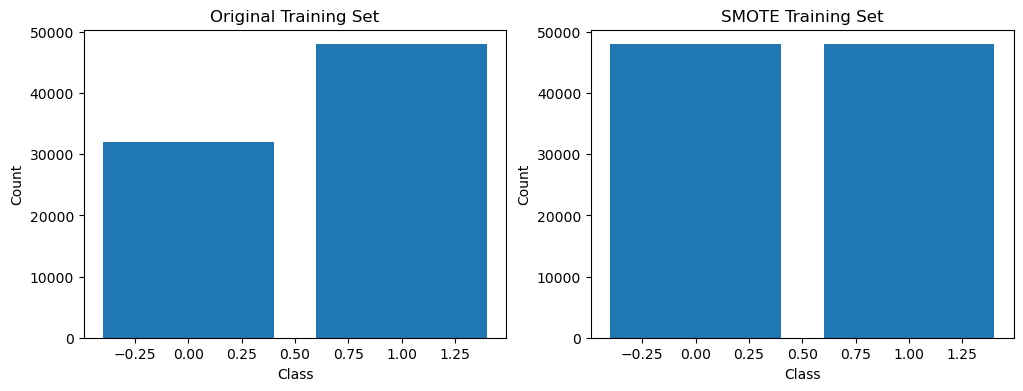

In [26]:
#SMOTE with default ratio = 1
# Apply SMOTE
preprocessor = build_pipeline(LogisticRegression()).named_steps['preprocessor']
smote = SMOTE(random_state=42, sampling_strategy=1)

X_train_preprocessed = preprocessor.fit_transform(X_train)

# Apply SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)
def plot_class_distribution(y_before, y_after):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Original class distribution
    axes[0].bar(*zip(*Counter(y_before).items()))
    axes[0].set_title("Original Training Set")
    axes[0].set_xlabel("Class")
    axes[0].set_ylabel("Count")

    # SMOTE-balanced class distribution
    axes[1].bar(*zip(*Counter(y_after).items()))
    axes[1].set_title("SMOTE Training Set")
    axes[1].set_xlabel("Class")
    axes[1].set_ylabel("Count")

    plt.show()

# Plot distributions
plot_class_distribution(y_train, y_train_smote)



In [18]:

# Define all models correctly
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42),
    'Linear SVM': LinearSVC(max_iter=10000, random_state=42, dual= 'auto'),   # fast linear SVM
    'MLP': MLPClassifier(hidden_layer_sizes=(100,50), max_iter=300, early_stopping=True, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, tree_method='hist', random_state=42,  eval_metric='logloss')
}




--- Timing: Logistic Regression ---
Fit time: 0.366 s


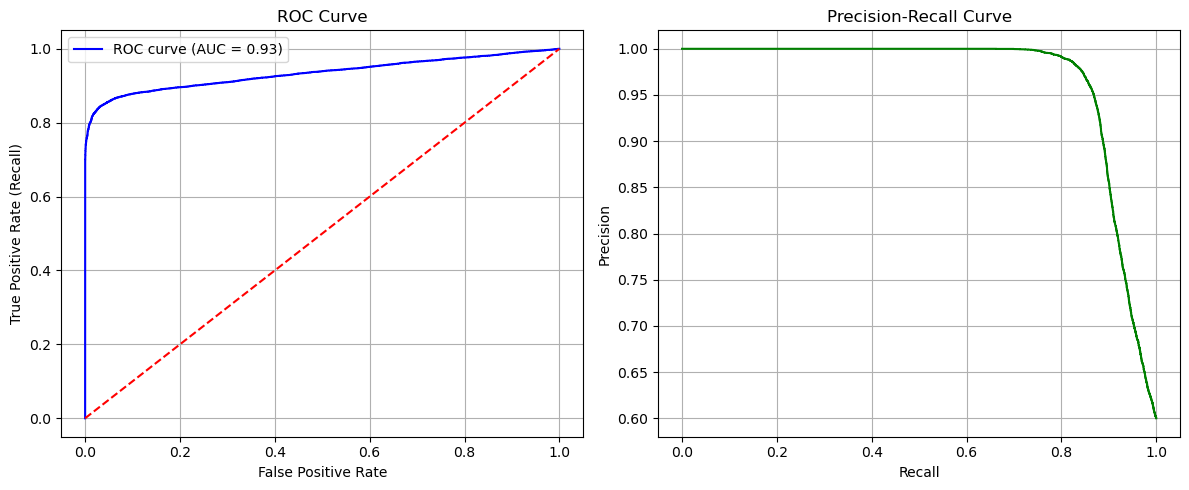


--- Timing: KNN ---
Fit time: 0.151 s


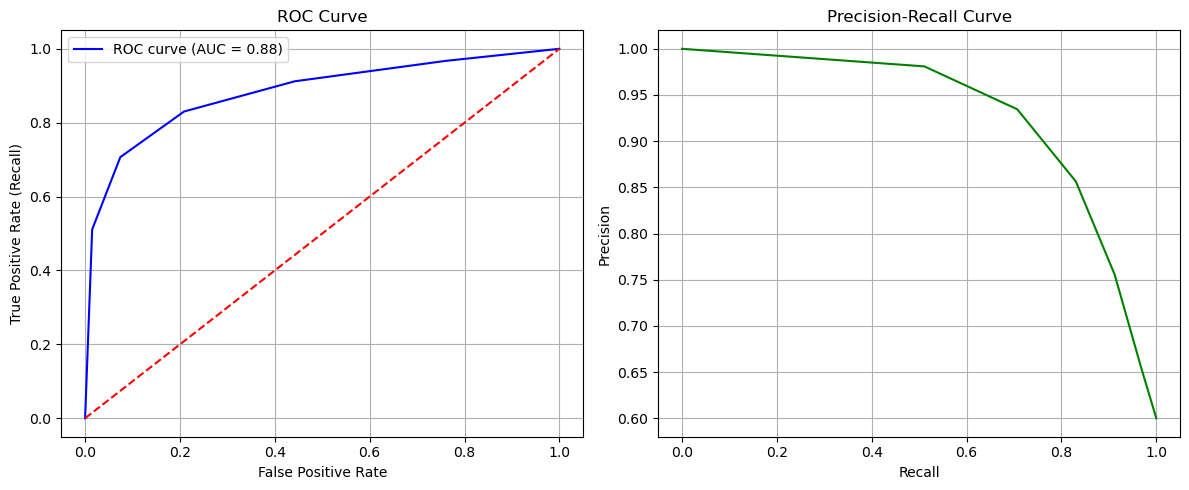


--- Timing: Random Forest ---
Fit time: 10.864 s


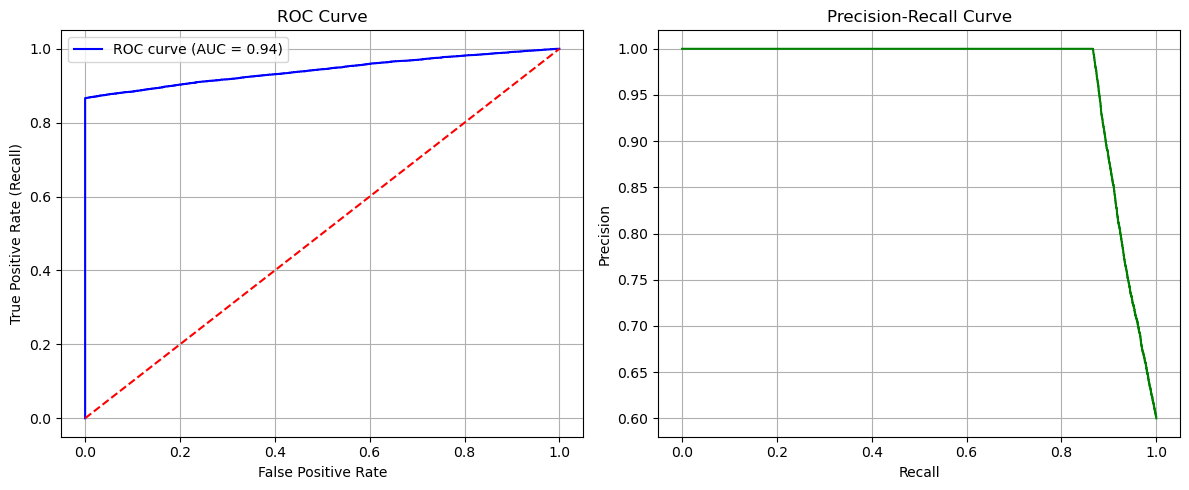


--- Timing: Linear SVM ---
Fit time: 0.742 s

--- Timing: MLP ---
Fit time: 12.806 s


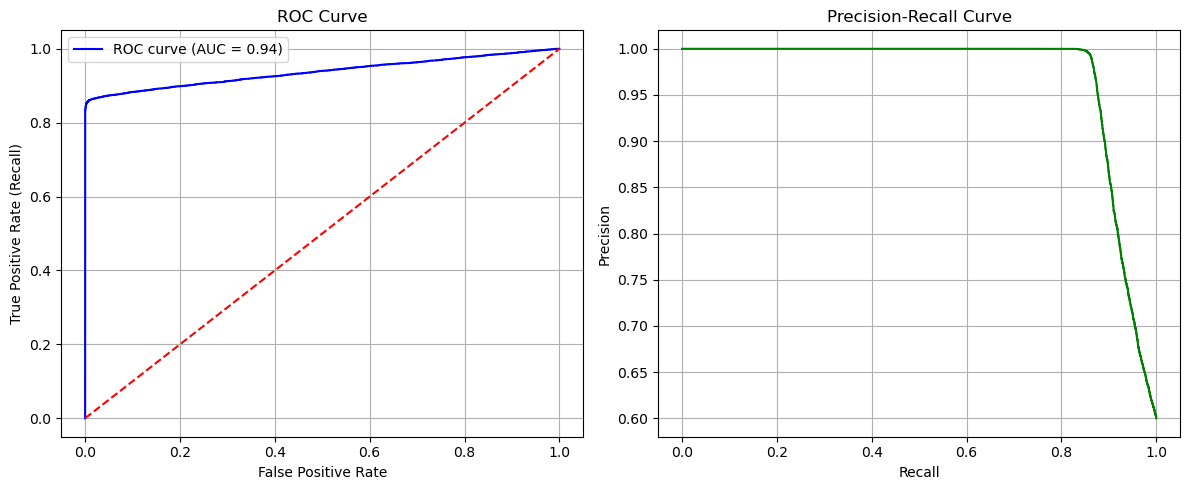


--- Timing: XGBoost ---
Fit time: 0.785 s


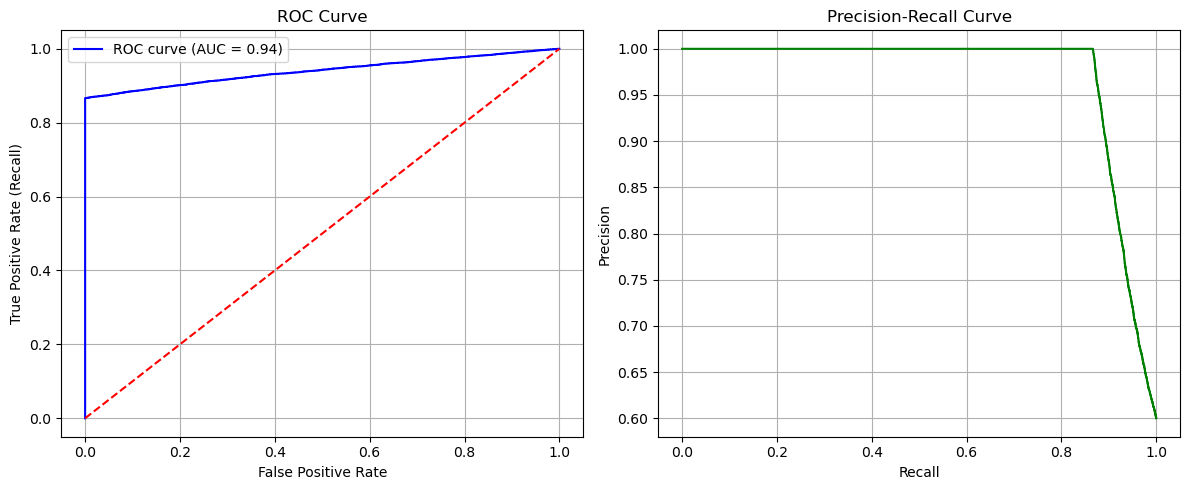

In [ ]:
#baseline for all models
results = []
for name, model in models.items():
    print(f"\n--- Timing: {name} ---")
    pipeline = make_pipeline_for(model)
    
    t0 = time.time()
    try:
        pipeline.fit(X_train, y_train)
        elapsed = round(time.time() - t0, 3)
        print(f"Fit time: {elapsed} s")

        # Predictions
        y_pred = pipeline.predict(X_test)

        # Some models do not support predict_proba (like LinearSVC)
        try:
            y_prob = pipeline.predict_proba(X_test)[:, 1]
            plot_roc_pr(y_test, y_prob, f"Baseline/roc_pr_curve_{name}.png")
        except:
            # fallback if no probabilities available
            y_prob = None

        # Evaluate metrics
        #Use for plotting roc curve for every default model
        #plot_roc_pr(y_test, y_pred)
        
        metrics = eval_class(y_test, y_pred, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        # Plot and save using matplotlib
        fig, ax = plt.subplots(figsize=(6,6))
        disp.plot(ax=ax)
        plt.savefig(f"Baseline/confusion_matrix_{name}.png", dpi=300, bbox_inches='tight')
        plt.close(fig)  # close figure to avoid overlapping plots if in a loop

        # Append results correctly
        results.append({
            'Model': name,
            'Fit Time (s)': elapsed,
            **metrics  # unpacks dict keys: accuracy, precision, recall, f1
        })

    except Exception as e:
        print(f"ERROR while fitting {name}: {e}")
    
    # Free memory
    del pipeline

df_results = pd.DataFrame(results)

#create Pandas Dataframe
columns_order = ['Model', 'accuracy', 'precision', 'recall', 'f1_score', 'Fit Time (s)']
df_results = df_results[columns_order]

# Save the results to csv file
df_results.to_csv(f"data/Baseline_Model_Unbalanced.csv")


--- Timing: Logistic Regression ---
Fit time: 2.202 s


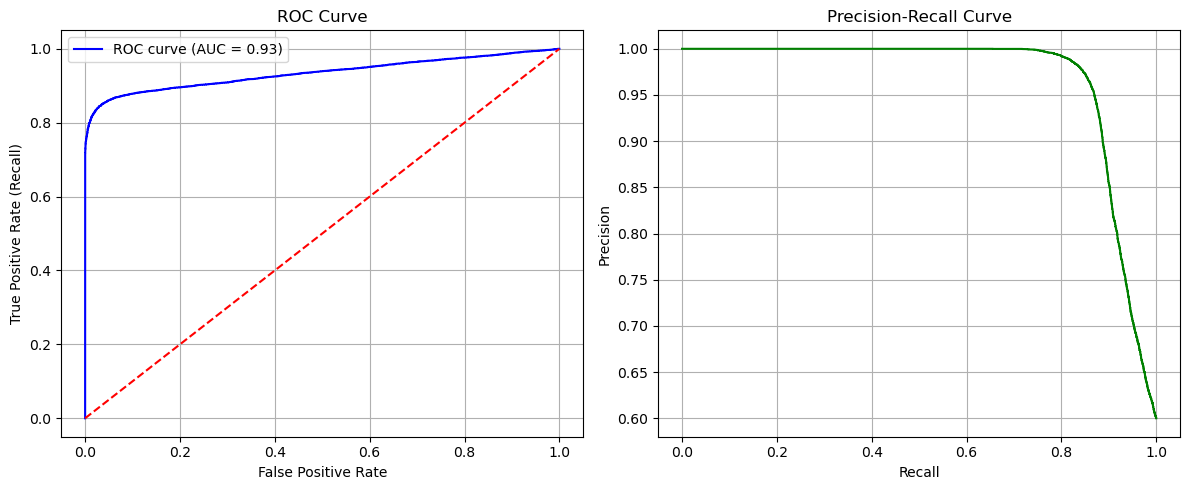


--- Timing: KNN ---
Fit time: 1.881 s


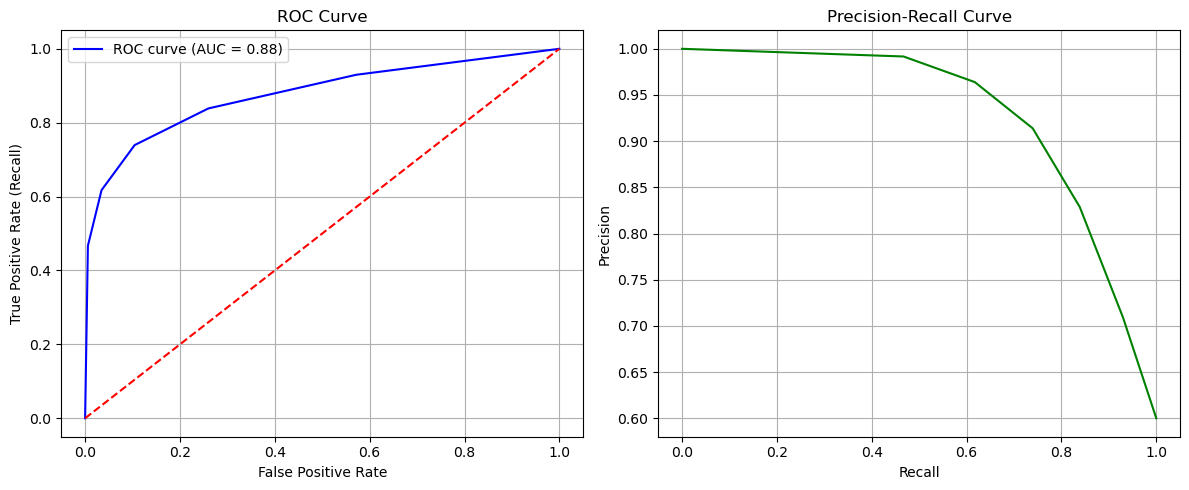


--- Timing: Random Forest ---
Fit time: 20.077 s


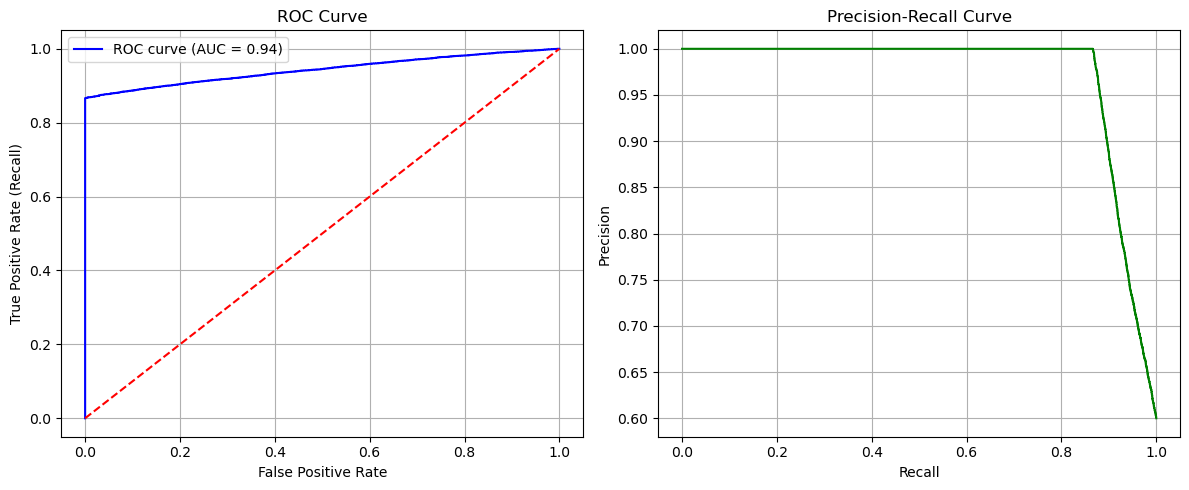


--- Timing: Linear SVM ---
Fit time: 2.404 s

--- Timing: MLP ---
Fit time: 10.667 s


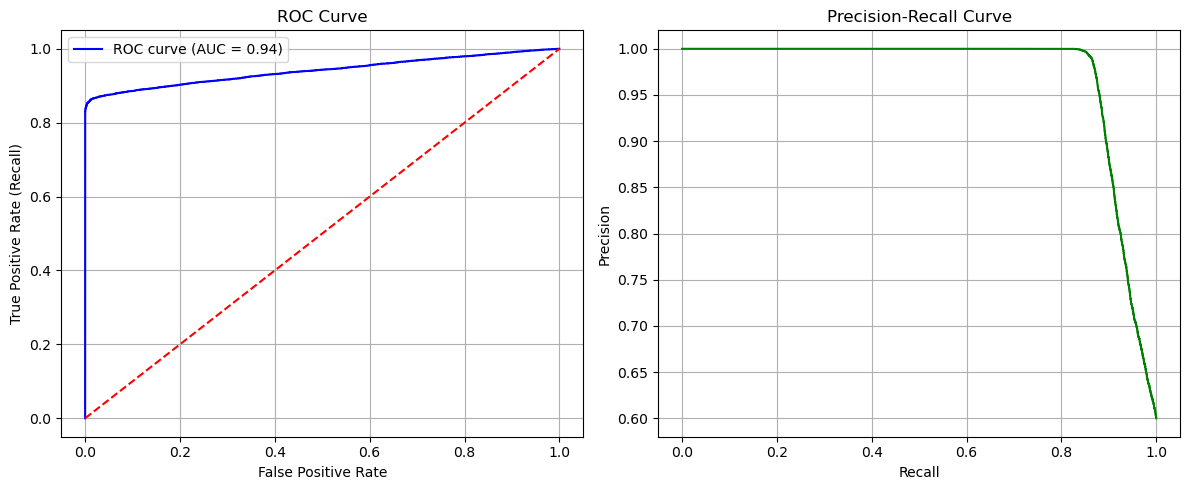


--- Timing: XGBoost ---
Fit time: 2.357 s


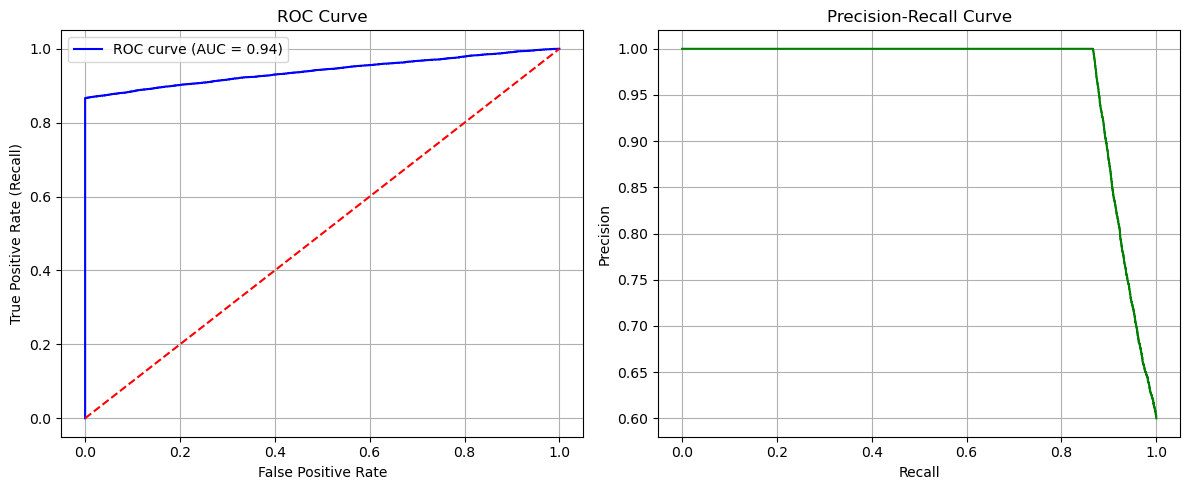

In [ ]:
#baseline for all models by using SMOTE
results = []
for name, model in models.items():
    print(f"\n--- Timing: {name} ---")
    pipeline = make_pipeline_for_SMOTE(model)
    
    t0 = time.time()
    try:
        pipeline.fit(X_train, y_train)
        elapsed = round(time.time() - t0, 3)
        print(f"Fit time: {elapsed} s")

        # Predictions
        y_pred = pipeline.predict(X_test)

        # Some models do not support predict_proba (like LinearSVC)
        try:
            y_prob = pipeline.predict_proba(X_test)[:, 1]
            plot_roc_pr(y_test, y_prob,f"SMOTE/roc_pr_curve_{name}.png")
    
        except:
            # fallback if no probabilities available
            y_prob = None

        # Evaluate metrics
        #Use for plotting roc curve for every default model
        #plot_roc_pr(y_test, y_pred)
        
        metrics = eval_class(y_test, y_pred, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        # Plot and save using matplotlib
        fig, ax = plt.subplots(figsize=(6,6))
        disp.plot(ax=ax)
        plt.savefig(f"SMOTE/confusion_matrix_{name}.png", dpi=300, bbox_inches='tight')
        plt.close(fig)  # close figure to avoid overlapping plots if in a loop
        # Append results correctly
        results.append({
            'Model': name,
            'Fit Time (s)': elapsed,
            **metrics  # unpacks dict keys: accuracy, precision, recall, f1
        })

    except Exception as e:
        print(f"ERROR while fitting {name}: {e}")
    
    # Free memory
    del pipeline

df_results = pd.DataFrame(results)

#create Pandas Dataframe
columns_order = ['Model', 'accuracy', 'precision', 'recall', 'f1_score', 'Fit Time (s)']
df_results = df_results[columns_order]

# Save the results to csv file
df_results.to_csv(f"data/Baseline_Model_SMOTE.csv")

In [27]:
#hypertuning dictionary

param_grids = {
    'Logistic Regression': {
        'model__penalty': ['l2'],
        'model__C': [0.01, 0.1, 1, 10],
        'model__solver': ['saga'],
        'model__class_weight': [None, 'balanced']   # useful for imbalance
    },
    
    'KNN': {
        'model__n_neighbors': [5, 7, 11],         # add slightly larger K
        'model__weights': ['uniform', 'distance'],
        'model__metric': ['euclidean', 'manhattan']  # allow both
    },

    'Random Forest': {
        'model__n_estimators': [80, 120],         # keep moderate
        'model__max_depth': [8, 12, None],        # add None for flexibility
        'model__min_samples_split': [2, 5],
        'model__max_features': ['sqrt', 'log2']   # useful speed/variance trade-off
    },

    'Linear SVM': {
        'model__C': [0.1, 1, 5],                  # fine search
        'model__class_weight': [None, 'balanced'] # improve recall for minority classes
    },
    
    'MLP': {
        'model__hidden_layer_sizes': [(50,), (100,), (100, 50)], 
        'model__activation': ['relu'],
        'model__alpha': [0.001, 0.01],    # add stronger regularization option
        'model__learning_rate': ['adaptive'],
        'model__max_iter': [300],
        'model__early_stopping': [True],
        'model__batch_size': [64, 128]            # speed up large data training
    },

    'XGBoost': {
        'model__n_estimators': [80, 120],
        'model__max_depth': [3, 5, 7],
        'model__learning_rate': [0.03, 0.1],
        'model__subsample': [0.8],
        'model__colsample_bytree': [0.8],
        'model__gamma': [0, 1]                    # complexity penalty tuning
    }
}



 Tuning Logistic Regression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


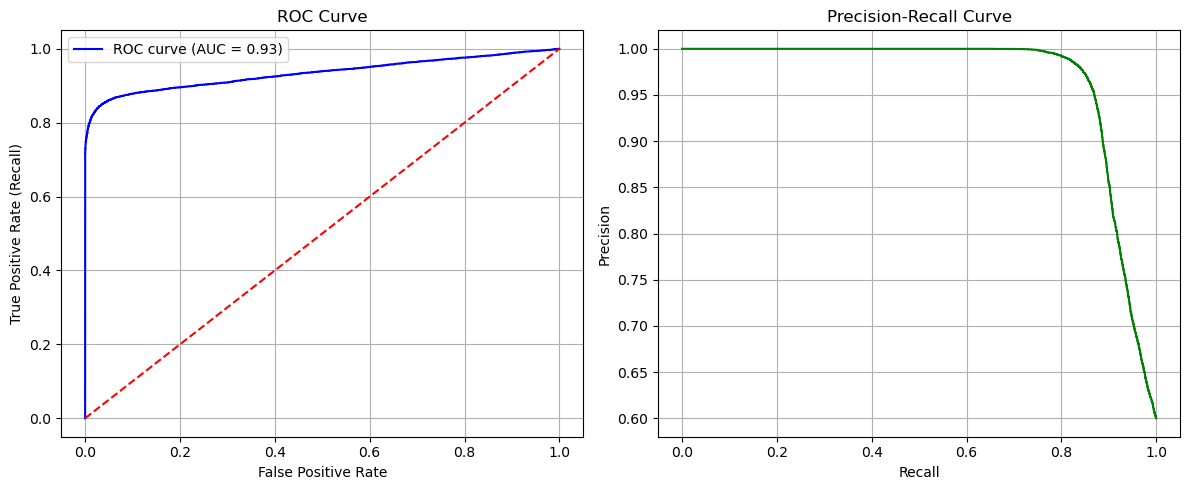


 Tuning KNN...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


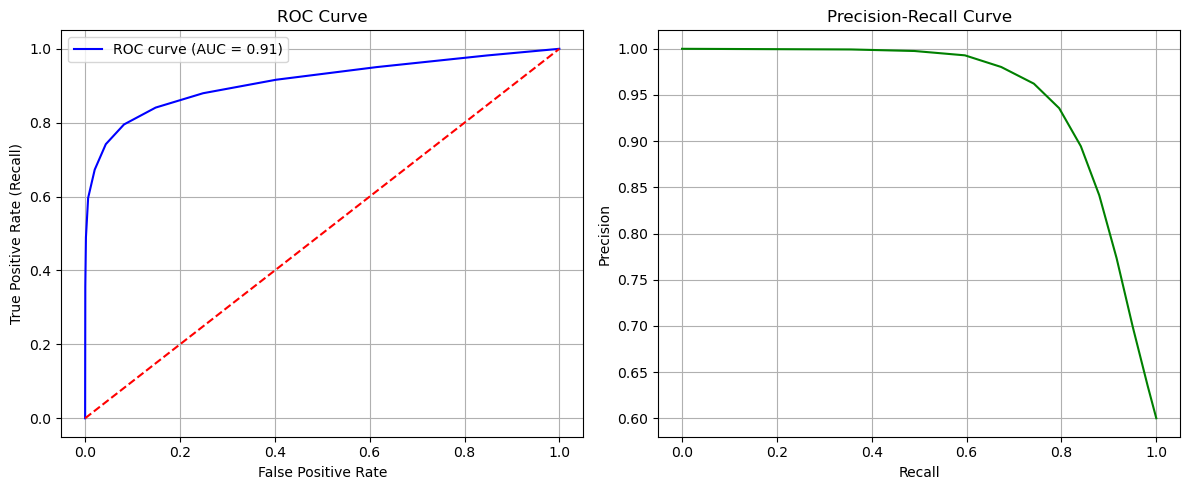


 Tuning Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


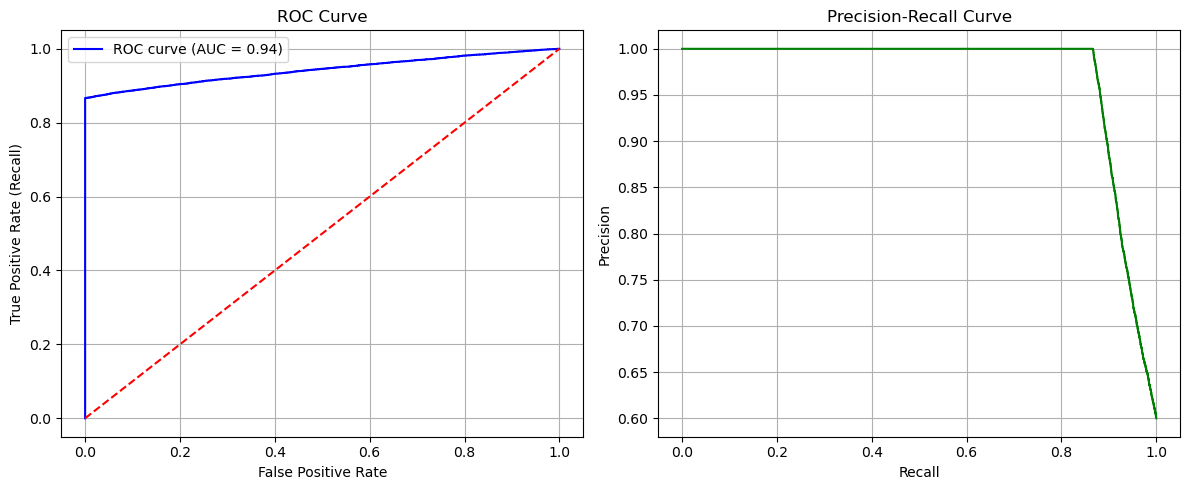


 Tuning Linear SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

 Tuning MLP...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


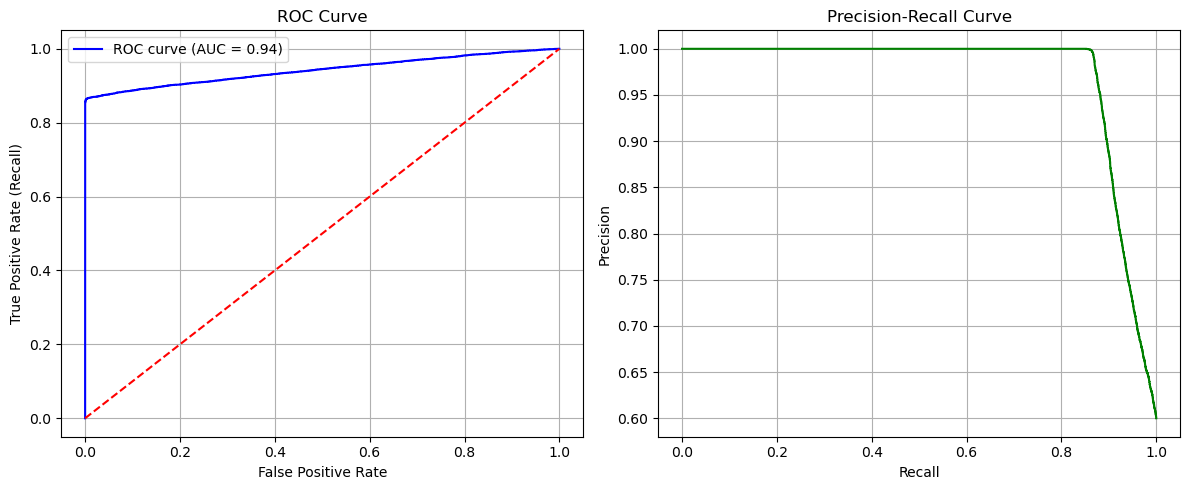


 Tuning XGBoost...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


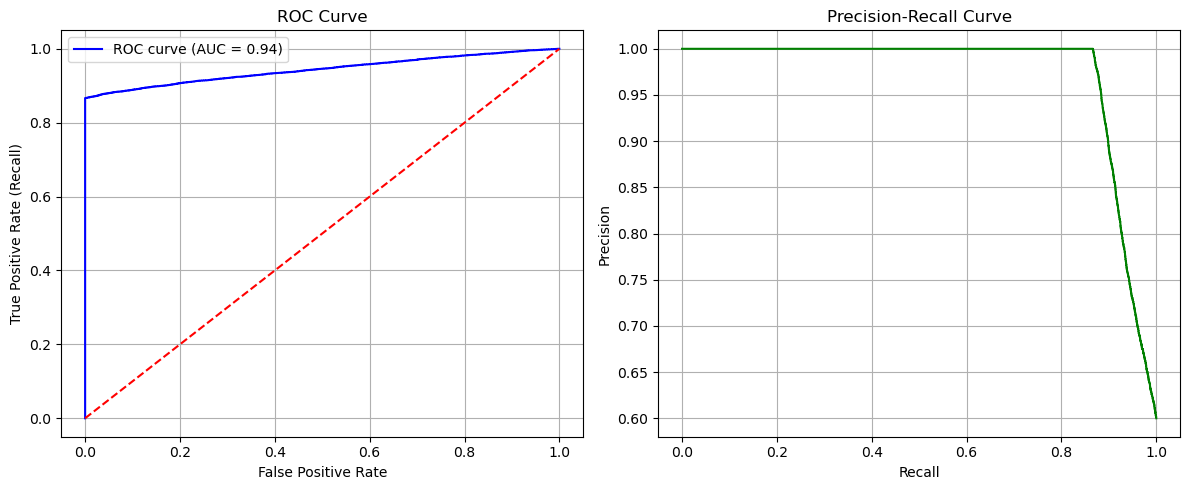

In [28]:

# List to store results
results_hyper = []

for name, model in models.items():
    print(f"\n Tuning {name}...")

    # Create pipeline for this model
    pipeline = make_pipeline_for_SMOTE(model)
    
    # Get parameter grid for this model
    params = param_grids.get(name)
    if params is None:
        print(f" No parameter grid for {name}, skipping...")
        continue

    # Setup GridSearchCV
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=params,
        scoring='f1',
        cv=5,          # reduce CV for large datasets
        n_jobs=1,
        verbose=1
    )

    start = time.time()
    try:
        grid.fit(X_train, y_train)
        elapsed = round(time.time() - start, 2)
    except Exception as e:
        print(f" ERROR during fitting {name}: {e}")
        continue

    # Best estimator
    best_model = grid.best_estimator_

    # Predictions
    y_pred = best_model.predict(X_test)

    # Predicted probabilities if available
    try:
        y_prob = best_model.predict_proba(X_test)[:, 1]
        plot_roc_pr(y_test,y_prob, f"Hyper/roc_curve_{name}.png")
    except:
        y_prob = None

    # Evaluate metrics
    metrics = eval_class(y_test, y_pred, y_prob)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # Plot and save using matplotlib
    fig, ax = plt.subplots(figsize=(6,6))
    disp.plot(ax=ax)
    plt.savefig(f"Hyper/confusion_matrix_{name}.png", dpi=300, bbox_inches='tight')
    plt.close(fig)  # close figure to avoid overlapping plots if in a loop
    # Append results in same format as baseline
    results_hyper.append({
        'Model': name,
        'Accuracy': metrics['accuracy'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1 Score': metrics['f1_score'],
        'Training Time (s)': elapsed,
        'Best Params': grid.best_params_
    })

# Convert results to DataFrame
df_results = pd.DataFrame(results_hyper)

# Display results
df_results.to_csv('Hyper_results_SMOTE.csv')
